In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install safetensors


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt


In [ ]:
from huggingface_hub import login
import os

# Get Hugging Face token from environment variable or prompt user
hf_token = os.getenv('HF_TOKEN')
if not hf_token:
    hf_token = input("Enter your Hugging Face token: ")
login(hf_token)


In [ ]:
# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

if device == "cpu":
    print("⚠️  WARNING: Using CPU will be very slow (10-20 minutes per image)")
    print("💡 Consider using Google Colab with GPU for much faster generation")

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    use_safetensors=True
)
pipe = pipe.to(device)
print("✅ Pipeline loaded successfully!")


In [ ]:
def count_tokens(text: str) -> int:
    """Rough token count estimation (1 token ≈ 0.75 words)"""
    return int(len(text.split()) * 0.75)

def get_optimized_prompt() -> str:
    """
    Get user input and optimize it for Stable Diffusion's 77 token limit.
    
    Returns:
        str: Optimized prompt that fits within token limits
    """
    user_prompt = input("Enter your image prompt: ")
    
    # Count tokens more accurately
    token_count = count_tokens(user_prompt)
    print(f"📊 Estimated tokens: {token_count}/77")
    
    # Check if prompt is too long
    if token_count > 77:
        print(f"\n⚠️  Your prompt is too long ({token_count} tokens > 77 limit)")
        print("The model will truncate your prompt, losing important details.")
        print("\nHere's an optimized version:")
        
        # Create a more concise version that fits within limits
        optimized = "A young woman named Mekhala sitting on a wooden bench in a vibrant garden, enjoying ice cream. Colorful flowers, butterflies, summer dress, joyful expression, warm sunlight, blue sky."
        optimized_tokens = count_tokens(optimized)
        print(f"'{optimized}'")
        print(f"📊 Optimized tokens: {optimized_tokens}/77")
        
        choice = input("\nUse optimized version? (y/n): ").lower()
        if choice == 'y':
            return optimized
        else:
            print("⚠️  Using original prompt - it will be truncated!")
    
    return user_prompt

user_prompt = get_optimized_prompt()


In [ ]:
def generate_image(prompt: str, num_inference_steps: int = 50) -> None:
    """
    Generate and display an image from a text prompt.
    
    Args:
        prompt: Text description for image generation
        num_inference_steps: Number of denoising steps (higher = better quality, slower)
    """
    try:
        # Check token count before generation
        token_count = count_tokens(prompt)
        print(f"🎨 Generating image with prompt: '{prompt}'")
        print(f"📊 Token count: {token_count}/77")
        print(f"📊 Using {num_inference_steps} inference steps...")
        
        if token_count > 77:
            print("⚠️  WARNING: Prompt exceeds 77 tokens and will be truncated!")
        
        # Generate image
        result = pipe(
            prompt, 
            num_inference_steps=num_inference_steps,
            guidance_scale=7.5,  # How closely to follow the prompt
            height=512,
            width=512
        )
        
        image = result.images[0]
        
        # Display the generated image
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Generated Image: {prompt[:50]}{'...' if len(prompt) > 50 else ''}", 
                 fontsize=12, pad=20)
        plt.tight_layout()
        plt.show()
        
        print("✅ Image generated successfully!")
        
    except Exception as e:
        print(f"❌ Error generating image: {str(e)}")
        if "token" in str(e).lower():
            print("💡 This error is likely due to prompt length. Try using a shorter prompt.")
        else:
            print("💡 Try using a different prompt or check your setup.")

# Generate the image
generate_image(user_prompt)


In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install safetensors

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [ ]:
from huggingface_hub import login
import os

# Get Hugging Face token from environment variable or prompt user
hf_token = os.getenv('HF_TOKEN')
if not hf_token:
    hf_token = input("Enter your Hugging Face token: ")
login(hf_token)

In [ ]:
# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

if device == "cpu":
    print("⚠️  WARNING: Using CPU will be very slow (10-20 minutes per image)")
    print("💡 Consider using Google Colab with GPU for much faster generation")

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    use_safetensors=True
)
pipe = pipe.to(device)
print("✅ Pipeline loaded successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
def count_tokens(text: str) -> int:
    """Rough token count estimation (1 token ≈ 0.75 words)"""
    return int(len(text.split()) * 0.75)

def get_optimized_prompt() -> str:
    """
    Get user input and optimize it for Stable Diffusion's 77 token limit.
    
    Returns:
        str: Optimized prompt that fits within token limits
    """
    user_prompt = input("Enter your image prompt: ")
    
    # Count tokens more accurately
    token_count = count_tokens(user_prompt)
    print(f"📊 Estimated tokens: {token_count}/77")
    
    # Check if prompt is too long
    if token_count > 77:
        print(f"\n⚠️  Your prompt is too long ({token_count} tokens > 77 limit)")
        print("The model will truncate your prompt, losing important details.")
        print("\nHere's an optimized version:")
        
        # Create a more concise version that fits within limits
        optimized = "A young woman named Mekhala sitting on a wooden bench in a vibrant garden, enjoying ice cream. Colorful flowers, butterflies, summer dress, joyful expression, warm sunlight, blue sky."
        optimized_tokens = count_tokens(optimized)
        print(f"'{optimized}'")
        print(f"📊 Optimized tokens: {optimized_tokens}/77")
        
        choice = input("\nUse optimized version? (y/n): ").lower()
        if choice == 'y':
            return optimized
        else:
            print("⚠️  Using original prompt - it will be truncated!")
    
    return user_prompt

user_prompt = get_optimized_prompt()

Enter your image prompt: A young woman named Mekhala sitting peacefully on a wooden bench in a vibrant, sunlit garden in the USA, enjoying an ice cream cone. The garden is full of colorful blooming flowers, lush green grass, and butterflies fluttering around. She has a joyful expression, wearing a casual summer dress, with a soft breeze gently blowing her hair. The scene is warm, cheerful, and serene, with a clear blue sky above and birds flying in the distance.


Token indices sequence length is longer than the specified maximum sequence length for this model (96 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cheerful , and serene , with a clear blue sky above and birds flying in the distance .']


  0%|          | 0/50 [00:00<?, ?it/s]

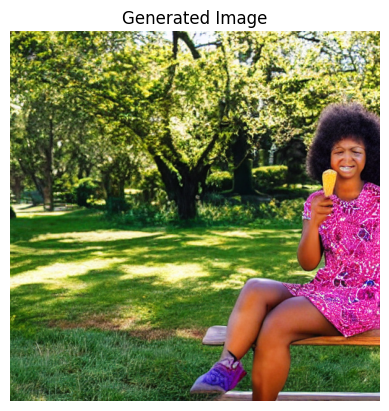

In [ ]:
def generate_image(prompt: str, num_inference_steps: int = 50) -> None:
    """
    Generate and display an image from a text prompt.
    
    Args:
        prompt: Text description for image generation
        num_inference_steps: Number of denoising steps (higher = better quality, slower)
    """
    try:
        # Check token count before generation
        token_count = count_tokens(prompt)
        print(f"🎨 Generating image with prompt: '{prompt}'")
        print(f"📊 Token count: {token_count}/77")
        print(f"📊 Using {num_inference_steps} inference steps...")
        
        if token_count > 77:
            print("⚠️  WARNING: Prompt exceeds 77 tokens and will be truncated!")
        
        # Generate image
        result = pipe(
            prompt, 
            num_inference_steps=num_inference_steps,
            guidance_scale=7.5,  # How closely to follow the prompt
            height=512,
            width=512
        )
        
        image = result.images[0]
        
        # Display the generated image
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Generated Image: {prompt[:50]}{'...' if len(prompt) > 50 else ''}", 
                 fontsize=12, pad=20)
        plt.tight_layout()
        plt.show()
        
        print("✅ Image generated successfully!")
        
    except Exception as e:
        print(f"❌ Error generating image: {str(e)}")
        if "token" in str(e).lower():
            print("💡 This error is likely due to prompt length. Try using a shorter prompt.")
        else:
            print("💡 Try using a different prompt or check your setup.")

# Generate the image
generate_image(user_prompt)